In [6]:
import os
import pandas as pd
import numpy as np
from src.my_settings import settings
from src.timecourse import extract_imagery_time_courses

In [7]:
# Settings
sett = settings()
subject_list = sett['sub_labels']
run_list = sett['run_labels']
roi_string = 'dIa'

In [ ]:
# Iterate over subjects and runs, extract timecourses, save in array
for subject in subject_list:
    for run in run_list:
        timecourse_nf = extract_imagery_time_courses(subject, 'nf', run, roi_string)
        timecourse_sham = extract_imagery_time_courses(subject, 'sham', run, roi_string)

        if timecourse_nf is not None:
            timecourse_nf = np.array(timecourse_nf)
            if 'timecourses_nf' not in locals():
                timecourses_nf = timecourse_nf
            else:
                timecourses_nf = np.vstack((timecourses_nf, timecourse_nf))

        if timecourse_sham is not None:
            timecourse_sham = np.array(timecourse_sham)
            if 'timecourses_sham' not in locals():
                timecourses_sham = timecourse_sham
            else:
                timecourses_sham = np.vstack((timecourses_sham, timecourse_sham))

Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


Found labels for dIa: [167, 168]


/opt/anaconda3/envs/musicnf-novelinterface/lib/python3.13/site-packages/nilearn/masking.py:980: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


In [ ]:
timecourses_nf.shape

(264, 20)

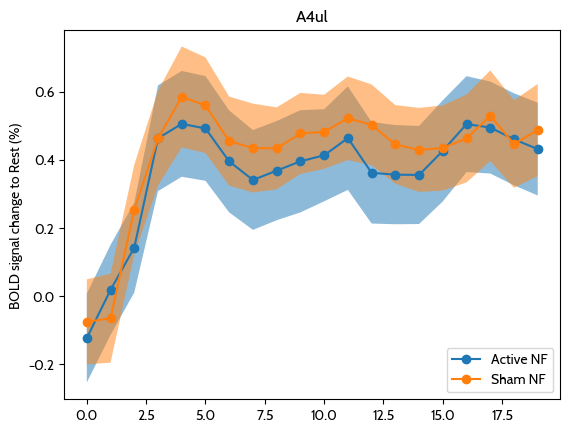

In [ ]:
# average across subjects and plot mean + SEM
mean_timecourse_nf = np.nanmean(timecourses_nf, axis=0)
std_timecourse_nf = np.nanstd(timecourses_nf, axis=0) / np.sqrt(22)
mean_timecourse_sham = np.nanmean(timecourses_sham, axis=0)
std_timecourse_sham = np.nanstd(timecourses_sham, axis=0) / np.sqrt(22)

# plot both
import matplotlib.pyplot as plt
plt.plot(mean_timecourse_nf, marker='o', label='Active NF')
plt.fill_between(range(mean_timecourse_nf.shape[0]), mean_timecourse_nf - std_timecourse_nf, mean_timecourse_nf + std_timecourse_nf, alpha=0.5)
plt.plot(mean_timecourse_sham, marker='o', label='Sham NF')
plt.fill_between(range(mean_timecourse_sham.shape[0]), mean_timecourse_sham - std_timecourse_sham, mean_timecourse_sham + std_timecourse_sham, alpha=0.5)

plt.ylabel('BOLD signal change to Rest (%)')
plt.title(roi_string)
plt.legend()
plt.show()